In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
os.chdir("../")

In [3]:
import ions
import piper

In [4]:
os.chdir("tests/")

In [5]:
major_ions = pd.read_csv("data/major_ions.csv")
major_ions = major_ions.fillna(value = 0)
major_ions.head()

,index,collected_date,Aquifer,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4
0,25690,09/01/1980,N,123.0,36.3,278.0,4.8,344.0,0.0,519.0,69.0
1,25690,14/01/1976,N,120.0,41.0,280.0,6.0,332.0,0.0,527.0,63.0
2,26197,13/01/1976,Qa,136.0,163.0,845.0,10.0,464.0,0.0,1664.0,206.0
3,26259,16/06/1976,Tomw,140.0,34.0,266.0,1.0,330.0,0.0,563.0,40.0
4,26364,26/08/1976,Tomw,116.0,27.0,152.0,2.0,316.0,0.0,314.0,51.0


In [6]:
iso = pd.read_csv("data/isotopes.csv")
iso = iso.fillna(value = 0)
iso.head()

,?DHNO,collected_date,Aquifer,D,O18
0,38805,07/05/2007,Ek,-26.6,-5.34
1,38805,13/11/2006,Ek,-28.4,-5.51
2,38848,31/05/2005,CP-j,-28.0,-5.32
3,39051,04/07/2005,CP-j,-29.5,-4.60
4,39057,23/05/2005,CP-j,-29.2,-5.22


### meq 

In [7]:
meq_ions = ions.meq(major_ions.iloc[:, 3:])
meq_ions.head()

,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4
0,6.138031,2.987040,12.092336,0.122767,-5.637792,-0.0,-14.639100,-1.436602
1,5.988323,3.373791,12.179331,0.153459,-5.441124,-0.0,-14.864751,-1.311680
2,6.786766,13.412878,36.755480,0.255766,-7.604463,-0.0,-46.935379,-4.288986
3,6.986377,2.797778,11.570364,0.025577,-5.408347,-0.0,-15.880179,-0.832813
4,5.788712,2.221765,6.611637,0.051153,-5.178902,-0.0,-8.856796,-1.061836


### mM

In [8]:
mM_ions = ions.mM(major_ions.iloc[:, 3:])
mM_ions.head()

,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4
0,3.069015,1.493520,12.092336,0.122767,5.637792,0.0,14.639100,0.718301
1,2.994161,1.686896,12.179331,0.153459,5.441124,0.0,14.864751,0.655840
2,3.393383,6.706439,36.755480,0.255766,7.604463,0.0,46.935379,2.144493
3,3.493188,1.398889,11.570364,0.025577,5.408347,0.0,15.880179,0.416406
4,2.894356,1.110883,6.611637,0.051153,5.178902,0.0,8.856796,0.530918


### Schoeller

In [9]:
_mM_ions = mM_ions
_mM_ions['Aquifer'] = major_ions['Aquifer']

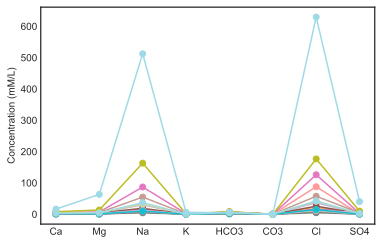

In [10]:
ions.schoeller(_mM_ions.groupby("Aquifer").mean())

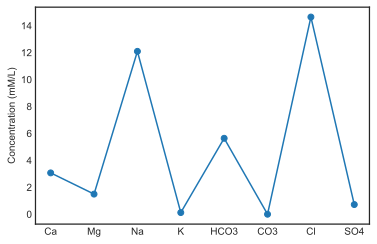

In [11]:
ions.schoeller(mM_ions.iloc[0,0:-1])

### Stable Isotopes vs Chloride

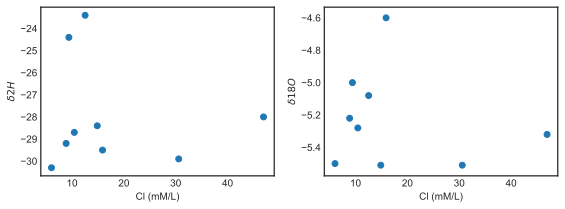

In [12]:
ions.chloride_vs_stable_isotopes(mM_ions['Cl'].values[1:10], iso["O18"].values[1:10], iso["D"].values[1:10])

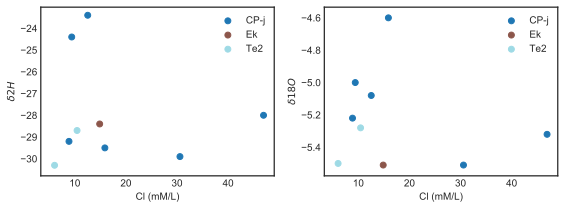

In [13]:
ions.chloride_vs_stable_isotopes(mM_ions['Cl'].values[1:10], iso["O18"].values[1:10], iso["D"].values[1:10], groupby = True, labels = iso["Aquifer"].values[1:10])

### Chloride vs major ion

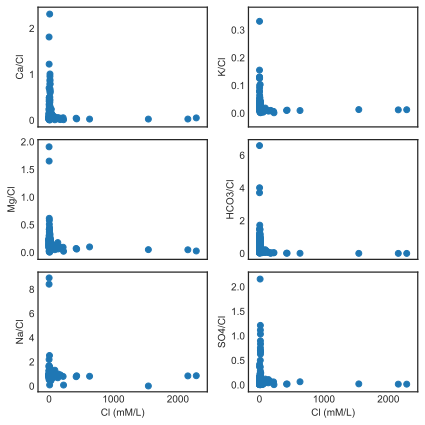

In [14]:
ions.chloride_ion_ratios(mM_ions.values, figsize= (6, 6))

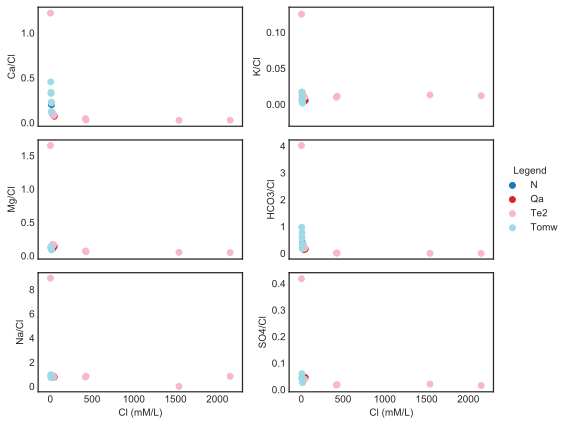

In [15]:
ions.chloride_ion_ratios(mM_ions.values[0:20], groupby = True, labels = mM_ions['Aquifer'].values[0:20], save = True, fname = 'Test.pdf')

### Piper

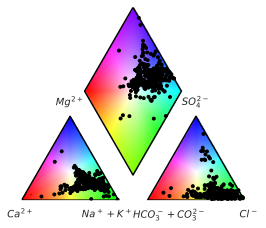

In [16]:
piper.piper(major_ions.iloc[:, 3:].values)

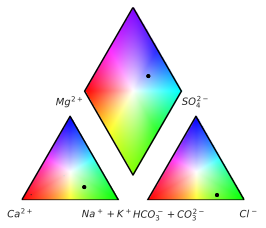

In [17]:
piper.piper(major_ions.iloc[1, 3:].values)